In [310]:
import sys

In [311]:
sys.version

'3.9.13 (main, Aug 25 2022, 18:29:29) \n[Clang 12.0.0 ]'

In [312]:
sys.path

['/Users/tnluser/PERSONAL/latex_ocr/notebooks',
 '/Users/tnluser/opt/anaconda3/envs/ocr/lib/python39.zip',
 '/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9',
 '/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9/lib-dynload',
 '',
 '/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9/site-packages']

In [351]:
import os
paths = [
    '../data/CROHME2011_data/CROHME_training/CROHME_training/',
    '../data/CROHME2012_data/trainData/trainData/',
    '../data/CROHME2013_data/TrainINKML/HAMEX/',
    '../data/CROHME2013_data/TrainINKML/MathBrush/',
    '../data/CROHME2013_data/TrainINKML/extension/',
    '../data/CROHME2013_data/TrainINKML/expressmatch/',
    '../data/CROHME2013_data/TrainINKML/KAIST/',
    '../data/CROHME2013_data/TrainINKML/HAMEX/',
#     '../data/CROHME2013_data/TrainINKML/MfrDB/', Error
#     '../data/CROHME2014_data/MatricesTrain/', Error
#     '../data/CROHME2016_data/Task-1-Formula/TEST2016_INKML_noGT/', None
    '../data/CROHME2016_data/Task-1-Formula/TEST2016_INKML_GT/',
#     '../data/CROHME2016_data/Task-2-Symbols/task2-trainSymb2014/trainingJunk/', None
#     '../data/CROHME2016_data/Task-2-Symbols/task2-trainSymb2014/trainingSymbols/', None
#     '../data/CROHME2016_data/Task-3-Structure/TestEM2013woStruct/', None
#     '../data/CROHME2016_data/Task-3-Structure/TestEM2014woStruct/', None
    '../data/CROHME2016_data/Task-4-Matrix/TEST2016_mat_inkmlGT/',
#     '../data/CROHME2016_data/Task-4-Matrix/TEST2016_mat_withoutGT/', None
    '../data/CROHME2019_data/Task1_onlineRec/MainTask_formula/Train/INKMLs/TestINKMLGT_2012/',
    '../data/CROHME2019_data/Task1_onlineRec/MainTask_formula/Train/INKMLs/TestINKMLGT_2013/',
    '../data/CROHME2019_data/Task1_onlineRec/MainTask_formula/Train/INKMLs/Train_2014/',
    '../data/CROHME2019_data/Task1_onlineRec/subTask_structure/Train/INKMLs/TestINKMLGT_2012/',
    '../data/CROHME2019_data/Task1_onlineRec/subTask_structure/Train/INKMLs/TestINKMLGT_2013/',
    '../data/CROHME2019_data/Task1_onlineRec/subTask_structure/Train/INKMLs/Train_2014/',
#     '../data/CROHME2019_data/Task1_onlineRec/subTask_symbols/Train/isolatedTest2012/', None
#     '../data/CROHME2019_data/Task1_onlineRec/subTask_symbols/Train/isolatedTest2013b/', None
#     '../data/CROHME2019_data/Task1_onlineRec/subTask_symbols/Train/isolatedTrain2014/trainingSymbols/', None
#     '../data/CROHME2019_data/Task1_onlineRec/subTask_symbols/Train/isolatedTrain2014/trainingJunk/', None
]
# files = os.listdir(path)

# Any results you write to the current directory are saved as output.

In [322]:
os.listdir('../data/CROHME2013_data/TrainINKML/')

['MathBrush',
 '.DS_Store',
 'extension',
 'expressmatch',
 'KAIST',
 'HAMEX',
 'MfrDB']

In [314]:
files = [k for k in files if 'inkml' in k]
files

['TrainData1_5_sub_21.inkml',
 'TrainData2_19_sub_98.inkml',
 'TrainData1_7_sub_12.inkml',
 'TrainData2_19_sub_20.inkml',
 'TrainData1_2_sub_21.inkml',
 'TrainData1_0_sub_12.inkml',
 'TrainData1_0_sub_5.inkml',
 'TrainData2_1_sub_33.inkml',
 'TrainData2_0_sub_11.inkml',
 'formulaire001-equation070.inkml',
 'TrainData2_21_sub_95.inkml',
 'formulaire002-equation051.inkml',
 'TrainData2_16_sub_88.inkml',
 'TrainData2_14_sub_46.inkml',
 'TrainData2_6_sub_33.inkml',
 'formulaire004-equation013.inkml',
 'TrainData2_7_sub_11.inkml',
 'formulaire004-equation056.inkml',
 'TrainData2_3_sub_6.inkml',
 'TrainData2_11_sub_88.inkml',
 'formulaire005-equation028.inkml',
 'TrainData2_26_sub_95.inkml',
 'formulaire008-equation065.inkml',
 'TrainData2_13_sub_46.inkml',
 'TrainData2_2_sub_43.inkml',
 'TrainData2_3_sub_61.inkml',
 'formulaire001-equation011.inkml',
 'TrainData2_17_sub_73.inkml',
 'TrainData2_16_sub_51.inkml',
 'TrainData2_18_sub_1.inkml',
 'TrainData2_1_sub_17.inkml',
 'formulaire008-equa

In [315]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [316]:
import numpy as np
from skimage.draw import line
from skimage.morphology import thin
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


def get_traces_data(inkml_file_abs_path, xmlns='{http://www.w3.org/2003/InkML}'):

    traces_data = []

    tree = ET.parse(inkml_file_abs_path)
    root = tree.getroot()
    # doc_namespace = "{http://www.w3.org/2003/InkML}"
    doc_namespace = xmlns

    'Stores traces_all with their corresponding id'
    traces_all = [{'id': trace_tag.get('id'),
                   'coords': [[round(float(axis_coord)) if float(axis_coord).is_integer() else round(float(axis_coord) * 10000)
                               for axis_coord in coord[1:].split(' ')] if coord.startswith(' ')
                              else [round(float(axis_coord)) if float(axis_coord).is_integer() else round(float(axis_coord) * 10000)
                                    for axis_coord in coord.split(' ')]
                              for coord in (trace_tag.text).replace('\n', '').split(',')]}
                  for trace_tag in root.findall(doc_namespace + 'trace')]

    'Sort traces_all list by id to make searching for references faster'
    traces_all.sort(key=lambda trace_dict: int(trace_dict['id']))

    'Always 1st traceGroup is a redundant wrapper'
    traceGroupWrapper = root.find(doc_namespace + 'traceGroup')

    if traceGroupWrapper is not None:
        for traceGroup in traceGroupWrapper.findall(doc_namespace + 'traceGroup'):

            label = traceGroup.find(doc_namespace + 'annotation').text

            'traces of the current traceGroup'
            traces_curr = []
            for traceView in traceGroup.findall(doc_namespace + 'traceView'):

                'Id reference to specific trace tag corresponding to currently considered label'
                traceDataRef = int(traceView.get('traceDataRef'))

                'Each trace is represented by a list of coordinates to connect'
                single_trace = traces_all[traceDataRef]['coords']
                traces_curr.append(single_trace)

            traces_data.append({'label': label, 'trace_group': traces_curr})

    else:
        'Consider Validation data that has no labels'
        [traces_data.append({'trace_group': [trace['coords']]})
         for trace in traces_all]

    return traces_data


def convert_to_imgs(traces_data, box_size=int(100)):

    patterns_enc = []
    classes_rejected = []

    for pattern in traces_data:

        trace_group = pattern['trace_group']

        'mid coords needed to shift the pattern'
        min_x, min_y, max_x, max_y = get_min_coords(trace_group)

        'traceGroup dimensions'
        trace_grp_height, trace_grp_width = max_y - min_y, max_x - min_x

        'shift pattern to its relative position'
        shifted_trace_grp = shift_trace_grp(
            trace_group, min_x=min_x, min_y=min_y)

        'Interpolates a pattern so that it fits into a box with specified size'
        'method: LINEAR INTERPOLATION'
        try:
            interpolated_trace_grp = interpolate(shifted_trace_grp,
                                                 trace_grp_height=trace_grp_height, trace_grp_width=trace_grp_width, box_size=box_size - 1)
        except Exception as e:
            print(e)
            print('This data is corrupted - skipping.')
            classes_rejected.append(pattern.get('label'))

            continue

        'Get min, max coords once again in order to center scaled patter inside the box'
        min_x, min_y, max_x, max_y = get_min_coords(interpolated_trace_grp)

        centered_trace_grp = center_pattern(
            interpolated_trace_grp, max_x=max_x, max_y=max_y, box_size=box_size)

        'Center scaled pattern so it fits a box with specified size'
        pattern_drawn = draw_pattern(centered_trace_grp, box_size=box_size)
        # Make sure that patterns are thinned (1 pixel thick)
        pat_thinned = 1.0 - thin(1.0 - np.asarray(pattern_drawn))
        plt.imshow(pat_thinned, cmap='gray')
        plt.show()
        pattern_enc = dict(
            {'features': pat_thinned, 'label': pattern.get('label')})

        # Filter classes that belong to categories selected by the user
#             if pattern_enc.get('label') in self.classes:

        patterns_enc.append(pattern_enc)

    return patterns_enc, classes_rejected


def get_min_coords(trace_group):

    min_x_coords = []
    min_y_coords = []
    max_x_coords = []
    max_y_coords = []

    for trace in trace_group:

        x_coords = [coord[0] for coord in trace]
        y_coords = [coord[1] for coord in trace]

        min_x_coords.append(min(x_coords))
        min_y_coords.append(min(y_coords))
        max_x_coords.append(max(x_coords))
        max_y_coords.append(max(y_coords))

    return min(min_x_coords), min(min_y_coords), max(max_x_coords), max(max_y_coords)


def shift_trace_grp(trace_group, min_x, min_y):

    shifted_trace_grp = []

    for trace in trace_group:
        shifted_trace = [[coord[0] - min_x, coord[1] - min_y]
                         for coord in trace]

        shifted_trace_grp.append(shifted_trace)

    return shifted_trace_grp


def interpolate(trace_group, trace_grp_height, trace_grp_width, box_size):

    interpolated_trace_grp = []

    if trace_grp_height == 0:
        trace_grp_height += 1
    if trace_grp_width == 0:
        trace_grp_width += 1

    '' 'KEEP original size ratio' ''
    trace_grp_ratio = (trace_grp_width) / (trace_grp_height)

    scale_factor = 1.0
    '' 'Set \"rescale coefficient\" magnitude' ''
    if trace_grp_ratio < 1.0:

        scale_factor = (box_size / trace_grp_height)
    else:

        scale_factor = (box_size / trace_grp_width)

    for trace in trace_group:
        'coordintes convertion to int type necessary'
        interpolated_trace = [
            [round(coord[0] * scale_factor), round(coord[1] * scale_factor)] for coord in trace]

        interpolated_trace_grp.append(interpolated_trace)

    return interpolated_trace_grp


def get_min_coords(trace_group):

    min_x_coords = []
    min_y_coords = []
    max_x_coords = []
    max_y_coords = []

    for trace in trace_group:

        x_coords = [coord[0] for coord in trace]
        y_coords = [coord[1] for coord in trace]

        min_x_coords.append(min(x_coords))
        min_y_coords.append(min(y_coords))
        max_x_coords.append(max(x_coords))
        max_y_coords.append(max(y_coords))

    return min(min_x_coords), min(min_y_coords), max(max_x_coords), max(max_y_coords)


def center_pattern(trace_group, max_x, max_y, box_size):

    x_margin = int((box_size - max_x) / 2)
    y_margin = int((box_size - max_y) / 2)

    return shift_trace_grp(trace_group, min_x=-x_margin, min_y=-y_margin)


def draw_pattern(trace_group, box_size):

    pattern_drawn = np.ones(shape=(box_size, box_size), dtype=np.float32)
    for trace in trace_group:

        ' SINGLE POINT TO DRAW '
        if len(trace) == 1:
            x_coord = trace[0][0]
            y_coord = trace[0][1]
            pattern_drawn[y_coord, x_coord] = 0.0

        else:
            ' TRACE HAS MORE THAN 1 POINT '

            'Iterate through list of traces endpoints'
            for pt_idx in range(len(trace) - 1):
                print(pt_idx, trace[pt_idx])

                'Indices of pixels that belong to the line. May be used to directly index into an array'
                pattern_drawn[line(r0=int(trace[pt_idx][1]), c0=int(trace[pt_idx][0]),
                                   r1=int(trace[pt_idx + 1][1]), c1=int(trace[pt_idx + 1][0]))] = 0

    return pattern_drawn


def inkml2img(input_path, output_path, color='black'):
    traces = get_traces_data(input_path)
    for elem in traces:
        ls = elem['trace_group']
        for subls in ls:
            data = np.array(subls)
            x, y = zip(*data)
            plt.plot(x, y, linewidth=2, c=color)
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
#     plt.savefig(output_path, bbox_inches='tight', dpi=100)
#     plt.gcf().clear()
    return plt, traces


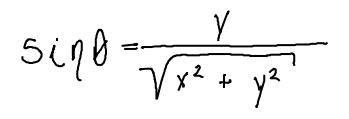

In [383]:
file = ''.join(file_paths[7779])
img, traces = inkml2img(file, '')
img.show()

In [373]:
def get_label(file):
    root = ET.parse(file).getroot()
    root_name = 'http://www.w3.org/2003/InkML'
    name = f'{"{"}{root_name}{"}"}annotation'
    anns = root.findall(name)
    for a in anns:
        if 'type' in a.attrib and a.attrib['type'] == 'truth':
            return a.text
tex = get_label('../data/CROHME2013_data/TrainINKML/expressmatch/101_leo.lg')
tex

ParseError: not well-formed (invalid token): line 1, column 1 (<string>)

In [353]:
# import io
# def latex_to_img(tex):
#     plt.rc('text', usetex=True)
#     plt.rc('font', family='serif')
#     plt.axis('off')
#     plt.text(0.05, 0.5, tex, size=40)
# #     plt.savefig(buf, format='png')
#     plt.show()
#     plt.close()

from IPython.display import Latex, display
    
display(Latex('$e = \\sum^{\\infty}_{k = 0} \\frac{1}{k !}$'))

<IPython.core.display.Latex object>

In [385]:
file_paths = []
for path in paths:
    files = os.listdir(path)
    file_paths += [[path, file] for file in files if '.lg' not in file]
    

In [386]:
len(file_paths)

33304

In [391]:
path, file = file_paths[12847]
file = path + file
print(file)
label = get_label(file)
display(Latex(f'${label}$'))
traces = get_traces_data(file)
print(traces)
img, traces = inkml2img(file, '')
id = col.insert_one({"label": label, "file": file, "traces": traces}).inserted_id
img.savefig(f'../dataset/{str(id)}.png', bbox_inches='tight', dpi=100)
img.gcf().clear()

../data/CROHME2016_data/Task-1-Formula/TEST2016_INKML_GT/UN_463_em_912.inkml


<IPython.core.display.Latex object>

IndexError: list index out of range

In [393]:
f = open(file)
print(f.read())

<ink xmlns="http://www.w3.org/2003/InkML">
<traceFormat>
<channel name="X" type="decimal"/>
<channel name="Y" type="decimal"/>
</traceFormat>
<annotation type="age">30</annotation>
<annotation type="gender">M</annotation>
<annotation type="hand">L</annotation>
<annotation type="writer">UN_463</annotation>
<annotation type="truth">$x^2+y^2+z^2-t(t-2a)=0$</annotation>
<annotation type="UI">CROHME_2016_em_912</annotation>
<annotation type="copyright">IVC/UNIV-NANTES</annotation>
<annotationXML type="truth" encoding="Content-MathML">
	<math xmlns='http://www.w3.org/1998/Math/MathML'>
		<mrow>
			<msup>
				<mi xml:id="x_1">x</mi>
				<mn xml:id="2_1">2</mn>
			</msup>
			<mrow>
				<mo xml:id="+_1">+</mo>
				<mrow>
					<msup>
						<mi xml:id="y_1">y</mi>
						<mn xml:id="2_2">2</mn>
					</msup>
					<mrow>
						<mo xml:id="+_2">+</mo>
						<mrow>
							<msup>
								<mi xml:id="z_1">z</mi>
								<mn xml:id="2_3">2</mn>
							</msup>
							<mrow>
								<mo xml:id="-_1">-</mo>

In [454]:
import pymongo

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["latex_ocr"]

col = db["data"]
def convert_to_xy(data):
    path, file_name = data
    file = path + file_name
    try:
        label = get_label(file)
    #     display(Latex(f'${label}$'))
        img, traces = inkml2img(file, '')
        id = col.insert_one({
            "label": label,
            "file": file,
            "root_path": path,
            "file_name": file_name,
            "traces": traces,
            "is_error": False
        }).inserted_id
        img.savefig(f'../dataset/{str(id)}.png', bbox_inches='tight', dpi=100)
        img.gcf().clear()
    except:
        id = col.insert_one({
            "label": '',
            "file": file,
            "root_path": path,
            "file_name": file_name,
            "traces": {},
            "is_error": True
        }).inserted_id

In [446]:
plt.gcf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [434]:
import multiprocessing as mp
import os
os.cpu_count()

12

In [455]:
from multiprocess import Pool
import tqdm
import time

data_to_process=file_paths

with Pool(12) as p:
    r = list(tqdm.tqdm(p.imap(convert_to_xy, data_to_process), total=len(data_to_process)))

  0%|                                                                                               | 0/33304 [00:00<?, ?it/s]/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9/site-packages/pymongo/topology.py:177: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9/site-packages/pymongo/topology.py:177: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#is-pymongo-fork-safe
  warnings.warn(
/Users/tnluser/opt/anaconda3/envs/ocr/lib/python3.9/site-packages/pymongo/topology.py:177: UserWarning: MongoClient opened before fork. Create MongoClient only after forking. See PyMongo's documentation for details: https://pymongo.readthedocs.io/en/stable/faq.html#